In [16]:
import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [24]:
import yfinance as yahooFinance
 
 
gold_price = yahooFinance.Ticker("GC=F")

In [25]:
Data = gold_price.history(period="2y")

In [26]:
Data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-16,1569.099976,1569.099976,1452.099976,1485.900024,193,0,0
2020-03-17,1469.300049,1537.699951,1469.300049,1524.900024,122,0,0
2020-03-18,1537.500000,1542.000000,1477.300049,1477.300049,333,0,0
2020-03-19,1481.500000,1491.599976,1471.000000,1478.599976,262,0,0
2020-03-20,1483.500000,1484.000000,1483.500000,1484.000000,14,0,0
...,...,...,...,...,...,...,...
2022-03-08,1999.400024,2072.000000,1998.000000,2040.099976,1813,0,0
2022-03-09,2053.600098,2063.000000,1980.800049,1985.900024,1022,0,0
2022-03-10,1978.099976,2010.500000,1978.099976,1998.099976,670,0,0


# Upsampling

In [45]:
data = Data.resample('D').mean()
data.head(7)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-16,1569.099976,1569.099976,1452.099976,1485.900024,193.0,0.0,0.0
2020-03-17,1469.300049,1537.699951,1469.300049,1524.900024,122.0,0.0,0.0
2020-03-18,1537.500000,1542.000000,1477.300049,1477.300049,333.0,0.0,0.0
2020-03-19,1481.500000,1491.599976,1471.000000,1478.599976,262.0,0.0,0.0
2020-03-20,1483.500000,1484.000000,1483.500000,1484.000000,14.0,0.0,0.0
2020-03-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
price= data.interpolate(method = 'linear')
price.head(7)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-16,1569.099976,1569.099976,1452.099976,1485.900024,193.000000,0.0,0.0
2020-03-17,1469.300049,1537.699951,1469.300049,1524.900024,122.000000,0.0,0.0
2020-03-18,1537.500000,1542.000000,1477.300049,1477.300049,333.000000,0.0,0.0
2020-03-19,1481.500000,1491.599976,1471.000000,1478.599976,262.000000,0.0,0.0
2020-03-20,1483.500000,1484.000000,1483.500000,1484.000000,14.000000,0.0,0.0
2020-03-21,1490.766683,1511.666667,1485.733317,1511.666667,26.333333,0.0,0.0
2020-03-22,1498.033366,1539.333333,1487.966634,1539.333333,38.666667,0.0,0.0


 Price = pd.DataFrame(Data)
Price.to_csv("Forecast data.csv")

In [49]:
price

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-16,1569.099976,1569.099976,1452.099976,1485.900024,193.000000,0.0,0.0
2020-03-17,1469.300049,1537.699951,1469.300049,1524.900024,122.000000,0.0,0.0
2020-03-18,1537.500000,1542.000000,1477.300049,1477.300049,333.000000,0.0,0.0
2020-03-19,1481.500000,1491.599976,1471.000000,1478.599976,262.000000,0.0,0.0
2020-03-20,1483.500000,1484.000000,1483.500000,1484.000000,14.000000,0.0,0.0
...,...,...,...,...,...,...,...
2022-03-10,1978.099976,2010.500000,1978.099976,1998.099976,670.000000,0.0,0.0
2022-03-11,1985.000000,1996.000000,1959.900024,1982.699951,670.000000,0.0,0.0
2022-03-12,1986.233317,1995.600016,1958.866699,1976.999959,26156.333333,0.0,0.0


In [51]:
x = price.drop(['Close'],axis =1)
y = price['Close']

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.26,  random_state=0)

In [53]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [54]:
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}
rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'random_state': 1, 'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 9, 'bootstrap': True}


In [55]:
model = RandomForestRegressor(n_estimators=100, random_state=1, min_samples_split=2, min_samples_leaf=1, max_depth=9, bootstrap=True)
model.fit(x_train, y_train)
predict = model.predict(x_test)
print(predict)
print(predict.shape)

[1806.15497644 1890.6437818  1725.61200353 1777.00915252 1800.69851273
 1784.218689   1777.28356196 1723.29043283 1733.4603574  1639.14265991
 1836.52408912 1893.31833457 1904.28286438 1897.85111587 1833.70315611
 1697.83740776 1815.66591939 1725.92485933 1795.72715973 1928.58595654
 1851.42507832 1744.12039111 1836.48297111 1897.09694003 1734.50781476
 1905.47363074 1807.93050645 1783.27228309 1625.78672614 1739.17325931
 1725.34870229 1918.89012979 1749.61546293 1797.84098295 1778.76390311
 1757.02238204 1902.24239896 1732.95383318 1776.53276422 1489.11100464
 1702.78123448 1832.26346297 1886.52760427 1777.40764859 1951.47442408
 1812.57686737 1802.85883573 1847.77881355 1863.40900015 1758.03457447
 1782.91050552 1786.17535286 1803.14047459 1847.4022174  1785.38161749
 1777.71343957 1800.63792664 1874.59168657 1905.80436798 1785.39009288
 1834.32825237 1933.48609326 1882.16450127 1736.43818647 1815.04184168
 1831.12480791 1810.24045848 1800.362445   1776.31376597 1801.5275206
 1750.2

In [56]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 5.3817
Mean Squared Error: 61.8038
Root Mean Squared Error: 7.8615
(R^2) Score: 0.9902
Train Score : 99.83% and Test Score : 99.02% using Random Tree Regressor.
Accuracy: 99.7 %.


In [59]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=data.index[-1], periods=len(predict), freq="D"))
predictions.to_csv("Predicted-price-data.csv")
#colllects future days from predicted values

onemonth_df = pd.DataFrame(predictions[:21])
onemonth_df.to_csv("one-month-predictions.csv")


Buy price and date
   Unnamed: 0  Predictions
9  2022-03-23   1639.14266
Sell price and date
    Unnamed: 0  Predictions
19  2022-04-02  1928.585957


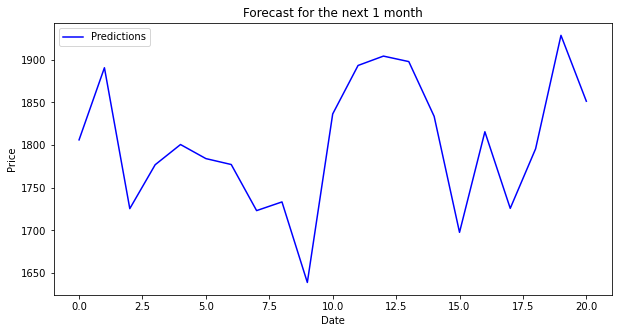

In [61]:
#onemonth_df_pred = pd.read_csv("one-month-predictions.csv")
#onemonth_df_pred.set_index("Date", inplace=True)
buy_price = min(onemonth_df_pred["Predictions"])
sell_price = max(onemonth_df_pred["Predictions"])
onemonth_buy = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == buy_price]
onemonth_sell = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(onemonth_buy)
print("Sell price and date")
print(onemonth_sell)
onemonth_df_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 1 month", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()